# Bank Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the dataset
data = pd.read_csv('data/bank_reviews3.csv')

# check the dimension of the dataset
print(data.shape)

# view the first 5 rows of the dataset
data.head()

(1000, 10)


,author,date,address,bank,rating,review_title_by_user,review,bank_image,rating_title_by_user,useful_count
0,AMRENDRA T,"Mar 21, 2020",New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,https://static.bankbazaar.com/images/common/ba...,Great!,133
1,BISHWA,"Mar 20, 2020",Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,89
2,SANTOSH,"Mar 20, 2020",Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,48
3,MAHADEV,"Mar 20, 2020",Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,https://static.bankbazaar.com/images/common/ba...,Blown Away!,52
4,R,"Mar 20, 2020",Bangalore,review,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",https://static.bankbazaar.com/images/common/ba...,Blown Away!,22


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               1000 non-null   object 
 1   bank                  1000 non-null   object 
 2   rating                1000 non-null   float64
 3   review_title_by_user  1000 non-null   object 
 4   review                1000 non-null   object 
 5   rating_title_by_user  1000 non-null   object 
 6   useful_count          1000 non-null   int64  
 7   polarity              1000 non-null   object 
 8   compound              1000 non-null   float64
 9   Sentiment_Category    1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.2+ KB


In [3]:
# remove columns that are not using for analysis
# columns to remove: ['author', 'date', 'bank_image']

data.drop(columns=['author', 'date', 'bank_image'], axis=1, inplace=True)

In [5]:
# total number of bank and address in the dataset

numAddress = data['address'].nunique()
numBank = data['bank'].nunique()

print(f'The reviews are collected from {numBank} different banks that located around {numAddress} of places in India.')
print('These banks are: ', data.bank.unique())

The reviews are collected from 10 different banks that located around 107 of places in India.
These banks are:  ['SBI' 'Axis Bank' 'HDFC Bank' 'review' 'IDBI' 'Kotak' 'IndusInd Bank'
 'Canara Bank' 'Citibank' 'Punjab National Bank']


In [7]:
# some of the data without 'bank' name and is named as 'review' in the dataset
# convert these data to 'Unknown'

data['bank'].replace('review','Unknown', inplace=True)

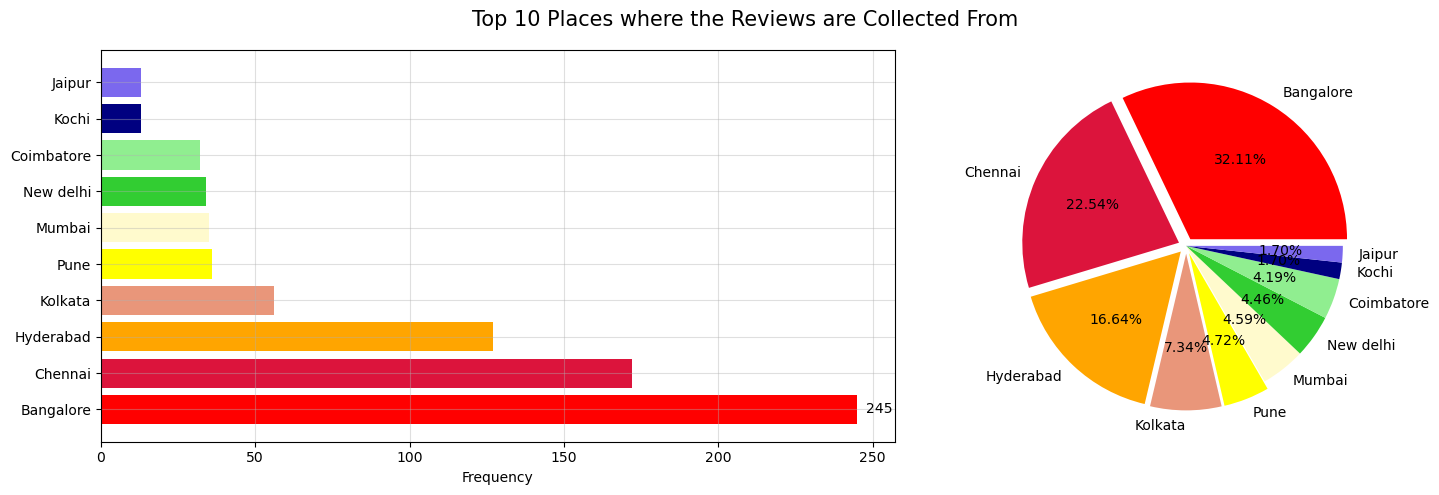

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [8]:
# distribution of the column 'address'
address = data['address'].value_counts().sort_values(ascending=False)[:10]

colors = ['red','crimson','orange','darksalmon','yellow','lemonchiffon','limegreen','lightgreen','navy','mediumslateblue']
explodes = ([0.05]*5) + ([0]*5)

# visualization (top 10 places where the reviews are collected from)
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=address.index, width=address.values, color=colors)
axes[0].set_xlabel('Frequency')

for index, values in enumerate (address):
        axes[0].text(values+3, index, str(values), va='center')
        
        axes[0].grid(alpha=0.4)
        axes[1].pie(address.values, labels=address.index, autopct='%.2f%%', explode=explodes, colors=colors)
        figure.suptitle('Top 10 Places where the Reviews are Collected From', fontsize=15)
        plt.tight_layout()
        plt.show()

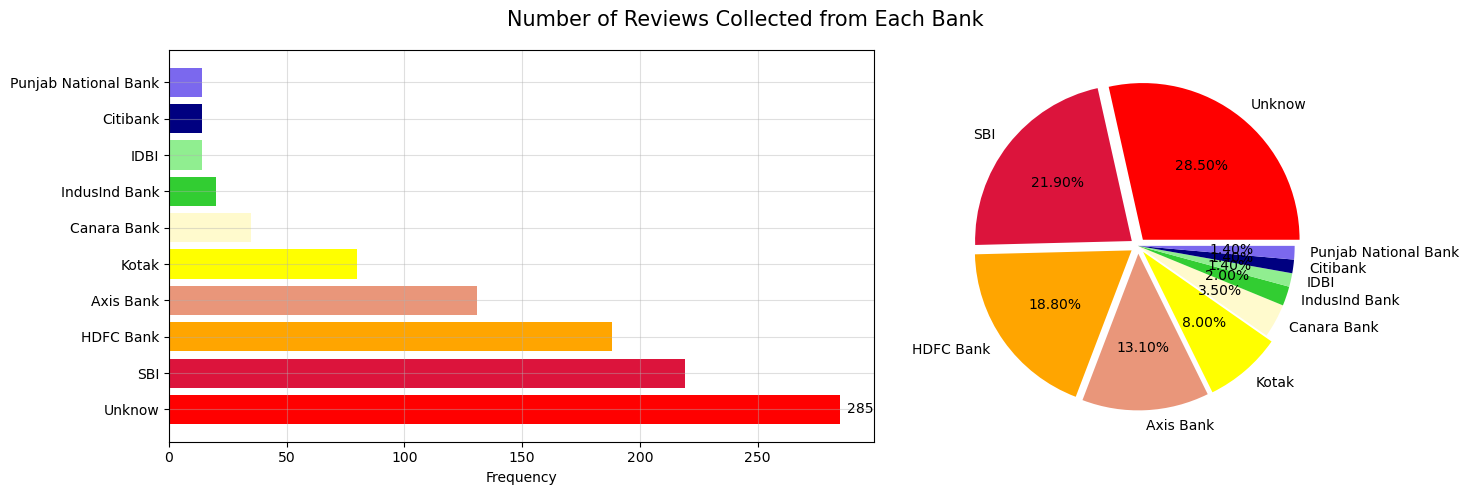

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [9]:
# distribution of the data by 'bank'
bank = data['bank'].value_counts().sort_values(ascending=False)

# visualization in bar chart and pie chart
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=bank.index, width=bank.values, color=colors)
axes[0].set_xlabel('Frequency')

for index, values in enumerate (bank):
        axes[0].text(values+3, index, str(values), va='center')
        
        axes[0].grid(alpha=0.4)
        axes[1].pie(bank.values, labels=bank.index, autopct='%.2f%%', explode=explodes, colors=colors)
        figure.suptitle('Number of Reviews Collected from Each Bank', fontsize=15)
        plt.tight_layout()
        plt.show()

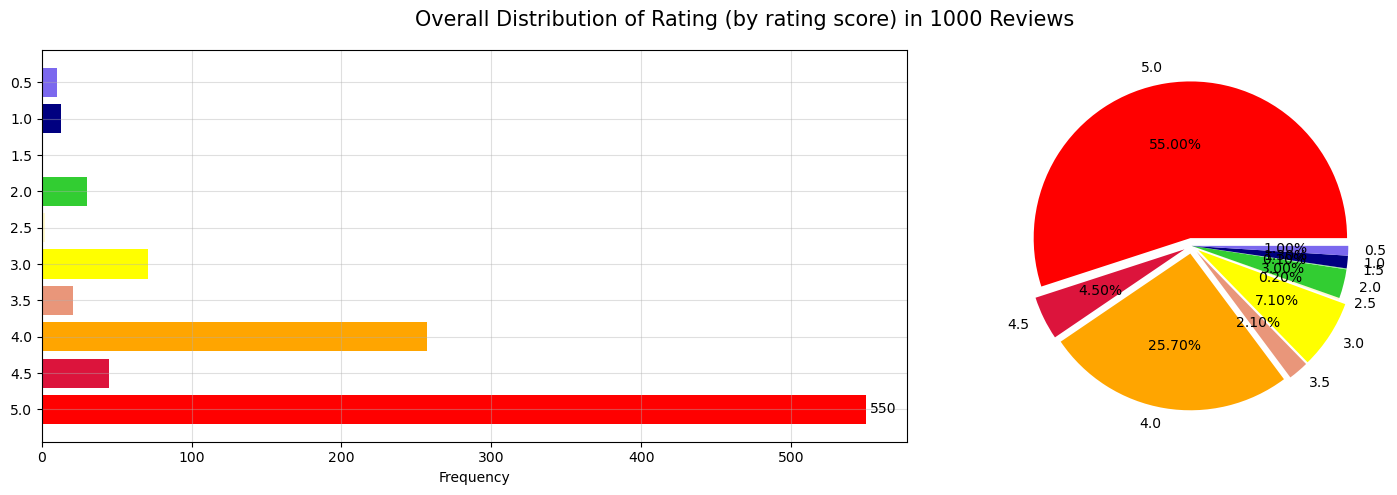

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
# distribution of rating (by rating score)
# convert the rating from int to str
data_copy = data.copy()
data_copy['rating'] = data_copy['rating'].astype(str)

rating = data_copy['rating'].value_counts().sort_index(ascending=False)

# visualization in bar chart and pie chart
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=rating.index, width=rating.values, color=colors)
axes[0].set_xlabel('Frequency')

for index, values in enumerate (rating):
        axes[0].text(values+3, index, str(values), va='center')
        
        axes[0].grid(alpha=0.4)
        axes[1].pie(rating.values, labels=rating.index, autopct='%.2f%%', explode=explodes, colors=colors)
        figure.suptitle('Overall Distribution of Rating (by rating score) in 1000 Reviews', fontsize=15)
        plt.tight_layout()
        plt.show()

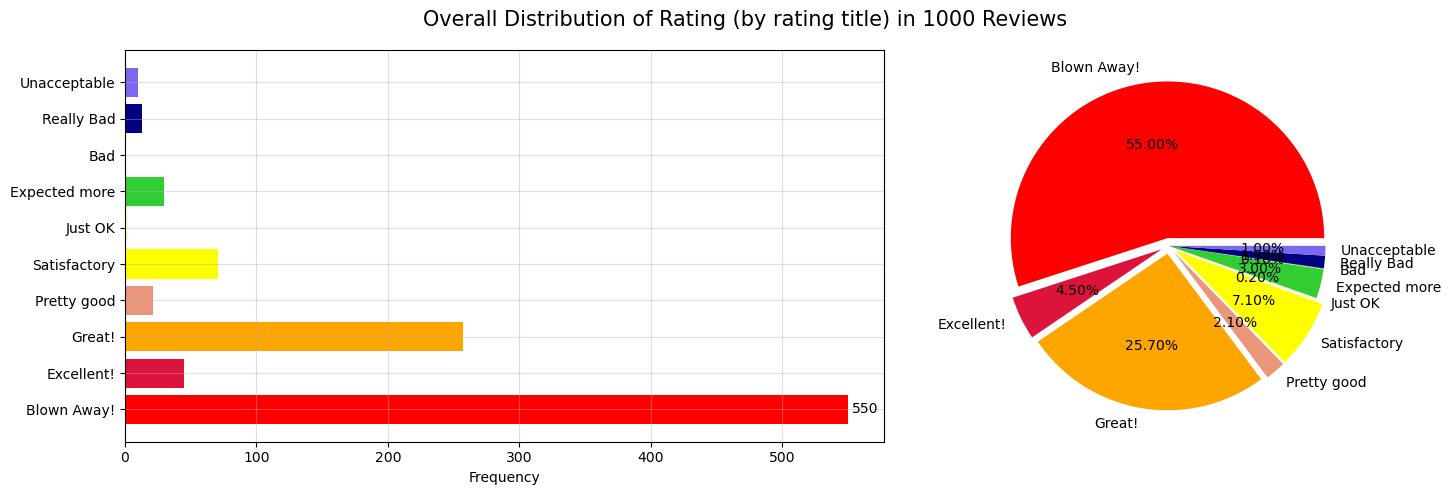

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
# distribution of rating (by rating title)
rating_order = ['Unacceptable','Really Bad','Bad','Expected more','Just OK','Satisfactory','Pretty good','Great!','Excellent!','Blown Away!']
rating_title = data['rating_title_by_user'].value_counts(sort=False).reindex(rating_order)
reversed_rating_title = rating_title[::-1]

# visualization in bar chart and pie chart
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=reversed_rating_title.index, width=reversed_rating_title.values, color=colors)
axes[0].set_xlabel('Frequency')

for index, values in enumerate (reversed_rating_title):
        axes[0].text(values+3, index, str(values), va='center')
        
        axes[0].grid(alpha=0.4)
        axes[1].pie(reversed_rating_title.values, labels=reversed_rating_title.index, autopct='%.2f%%', explode=explodes, colors=colors)
        figure.suptitle('Overall Distribution of Rating (by rating title) in 1000 Reviews', fontsize=15)
        plt.tight_layout()
        plt.show()

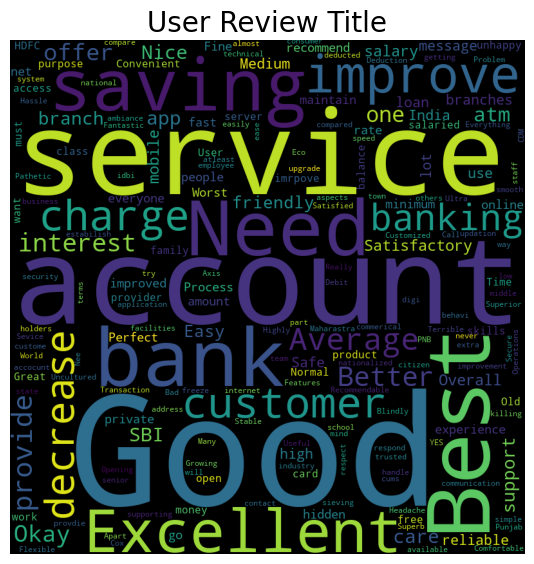

In [36]:
from wordcloud import WordCloud

combined_title = ' '.join(data['review_title_by_user'])


# create a word cloud using the combined text
wordcloud_title = WordCloud(collocations=False, width = 800, height = 800,
                                                       background_color ='black',
                                                       min_font_size = 10).generate(combined_title)

# plot the WordCloud image
plt.figure(figsize=(6,6))
plt.imshow(wordcloud_title)
plt.axis('off')
plt.title('User Review Title', fontsize=20)
plt.tight_layout(pad=2)
plt.show()

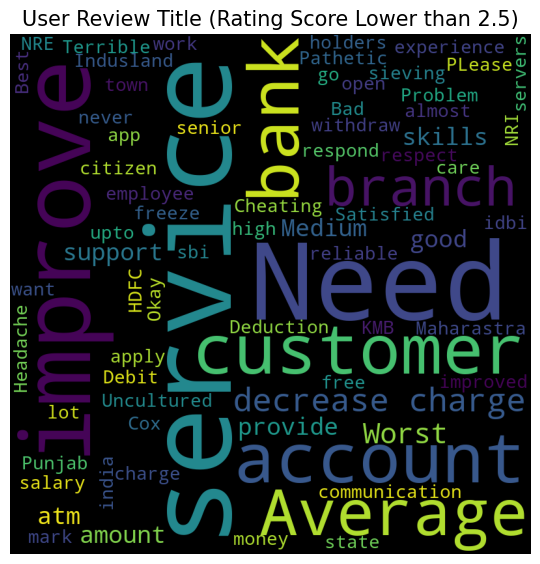

In [26]:
# subset the data that rating score is 2.5 and lower
data_copy = data.copy()
data_copy = data[data['rating']<=2.5]

combined_title_lowrate = ' '.join(data_copy['review_title_by_user'])


# create a word cloud using the combined text
wordcloud_lowrate = WordCloud(width = 800, height = 800,
                                                         background_color ='black',
                                                         min_font_size = 10).generate(combined_title_lowrate)

# plot the WordCloud image
plt.figure(figsize=(6,6))
plt.imshow(wordcloud_lowrate)
plt.axis('off')
plt.title('User Review Title (Rating Score Lower than 2.5)', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

In [14]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# initialize the object of SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...


In [15]:
# calculate the polarity scores of the review
data['polarity'] = data['review'].apply(sia.polarity_scores)
data['compound'] = data['polarity'].apply(lambda x: x.get('compound'))

In [18]:
# define a function to perform the sentiment categorization
def categorize(score):
        if score < 0:
            return 'To be Improved'
        elif score > 0.8:
            return 'Blown Away'
        else:
            return 'Neutral'

In [19]:
# insert a new column 'Sentiment_Category' by categorized the sentiment based on the compound score
data['Sentiment_Category'] = data['compound'].apply(categorize)

# view the first 5 rows of the data after new columns inserted
data.head()

,address,bank,rating,review_title_by_user,review,rating_title_by_user,useful_count,polarity,compound,Sentiment_Category
0,New delhi,SBI,4.0,"""Best saving""",State Bank Of India is located nearby in our a...,Great!,133,"{'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'comp...",0.7264,Neutral
1,Kolkata,SBI,5.0,"""Good service""","I have my salary account in SBI, when I applie...",Blown Away!,89,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",0.7165,Neutral
2,Hooghly,Axis Bank,5.0,"""Excellent Service""",I am using Axis bank saving account for the p...,Blown Away!,48,"{'neg': 0.08, 'neu': 0.785, 'pos': 0.135, 'com...",0.4588,Neutral
3,Pune,HDFC Bank,5.0,"""Excellent service""",I have my salary bank account in HDFC bank for...,Blown Away!,52,"{'neg': 0.042, 'neu': 0.849, 'pos': 0.108, 'co...",0.5267,Neutral
4,Bangalore,Unknow,5.0,"""Good account""","Close to around 10 years, I am holding this Co...",Blown Away!,22,"{'neg': 0.0, 'neu': 0.837, 'pos': 0.163, 'comp...",0.7357,Neutral


In [50]:
df=data.groupby('Sentiment_Category').count()

In [51]:
df.head().sort_values(['compound'])

,address,bank,rating,review_title_by_user,review,rating_title_by_user,useful_count,polarity,compound
Sentiment_Category,,,,,,,,,
Blown Away,197,197,197,197,197,197,197,197,197
To be Improved,228,228,228,228,228,228,228,228,228
Neutral,575,575,575,575,575,575,575,575,575


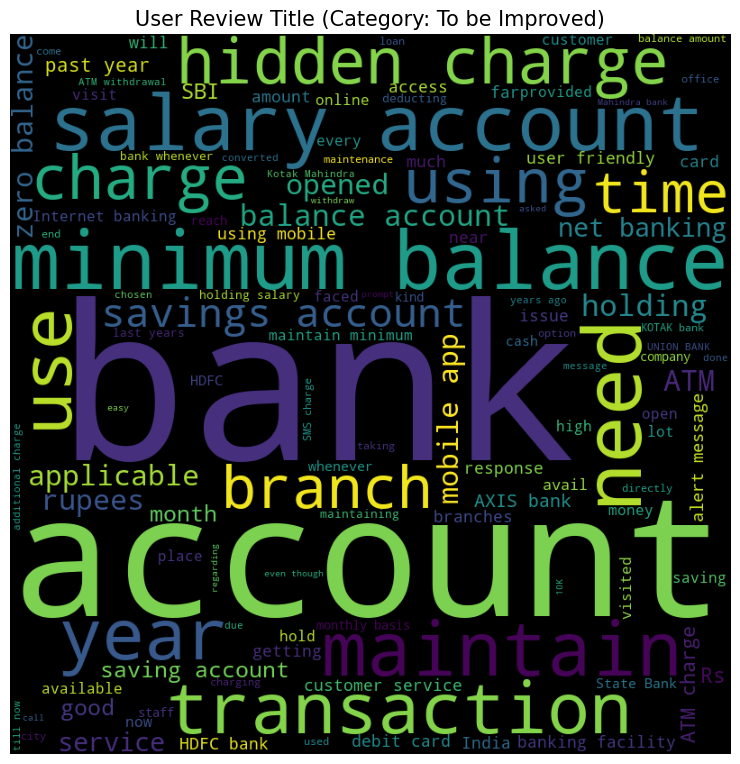

In [25]:
data_copy = data.copy()
data_copy = data[data['Sentiment_Category']=='To be Improved']

combined_tobeImproved = ' '.join(data_copy['review'])


# create a word cloud using the combined text
wordcloud_tobeImproved = WordCloud(width = 800, height = 800,
                                                              background_color ='black',
                                                              min_font_size = 10).generate(combined_tobeImproved)

# plot the WordCloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_tobeImproved)
plt.axis('off')
plt.title('User Review Title (Category: To be Improved)', fontsize=15)
plt.tight_layout(pad=2)
plt.show()

In [21]:
import re

common_words = ['bank', 'account','salary','saving','savings','rupees']

pattern = re.compile(r'\b(?:' + '|'.join(map(re.escape, common_words)) + r')\b', flags=re.IGNORECASE)
filtered_string = pattern.sub('', combined_tobeImproved)

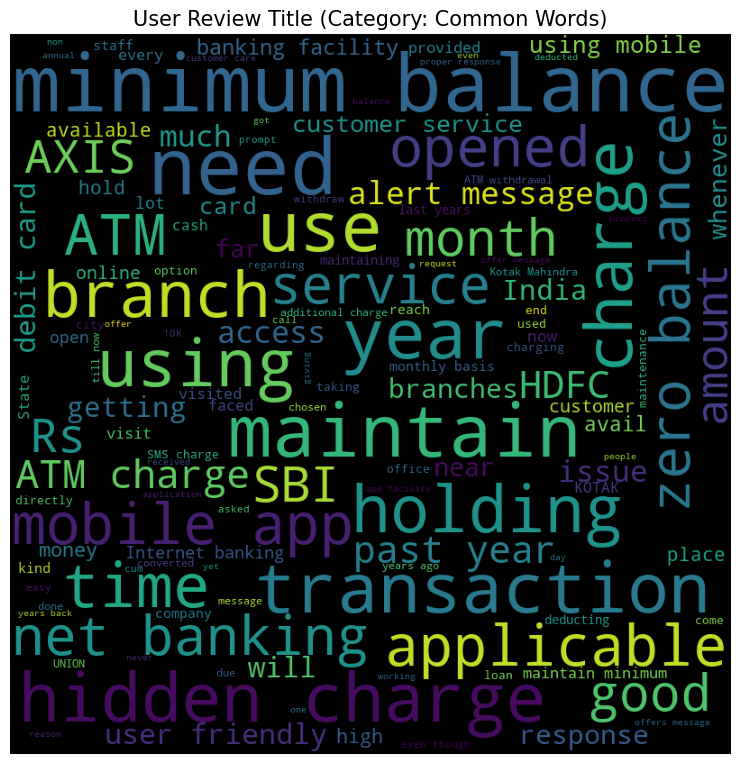

In [40]:
# create a word cloud using the combined text
wordcloud_tobeImproved = WordCloud(width = 800, height = 800,
                                                              background_color ='black',
                                                              min_font_size = 10).generate(filtered_string)

# plot the WordCloud image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_tobeImproved)
plt.axis('off')
plt.title('User Review Title (Category: Common Words)', fontsize=15)
plt.tight_layout(pad=2)
plt.show()